In [410]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

#Load data set
df = pd.read_csv("mobile-price-classification.csv")

In [411]:
#Reviewing the data set
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [412]:
#look for missing values
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [413]:
#confirm all columns are neumarical
print(df.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [414]:
#check class balance of the target

#count class distribution
print(df["price_range"].value_counts())

#percentage distribution
print(df["price_range"].value_counts(normalize=True)*100)

price_range
1    1000
0    1000
Name: count, dtype: int64
price_range
1    50.0
0    50.0
Name: proportion, dtype: float64


In [415]:
#Remove duplicate columns and rows

df = df.drop_duplicates()

df = df.loc[:, ~df.columns.duplicated()]

df.shape

(2000, 21)

In [416]:
#Check for non-informative constants

constast_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constast_cols)

if constast_cols != None:
    df = df.drop(columns=constast_cols)


Constant columns: []


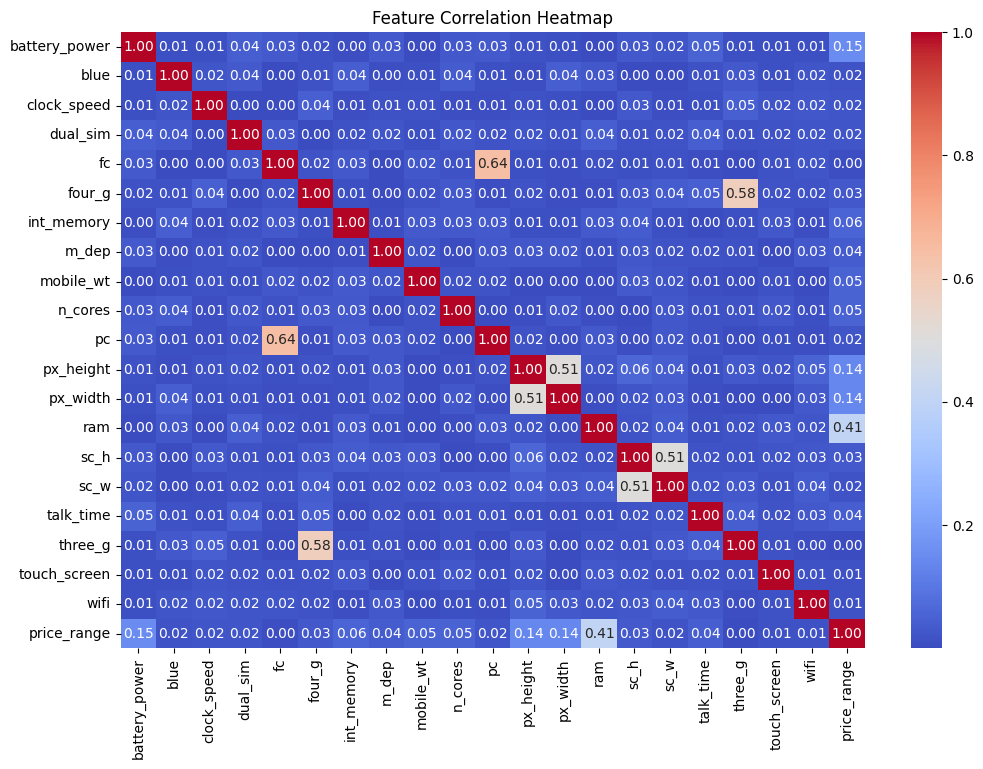

Highly Correlated columns to drop: []


In [417]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation matrix
corr = df.corr().abs()

#plot the correlation heat map
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

#retrive the upper level of the matrix
upper = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)

#find columns that has 0.95+ correlation
need_drop = [column for column in upper.columns if any(upper[column]>0.95)]
print("Highly Correlated columns to drop:", need_drop)

if need_drop != None:
    df = df.drop(columns=need_drop) 


In [418]:
#spliting data into training and testing
from sklearn.model_selection import train_test_split

#Separate features(X) and target(Y)
X = df.drop(columns=["price_range"])
Y = df["price_range"]

#Train-test split with stratification
X_train, x_test, Y_train, y_test = train_test_split(
    X,Y,
    test_size=0.25,
    stratify=Y,
    random_state=42,
    shuffle=True
)

In [419]:
#perform scaling to prevent the unusual distribution of features
from sklearn.preprocessing import StandardScaler

#Applying the scaler to training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Applying the scaler to the testing set
x_test_scaled = scaler.transform(x_test)

In [420]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Build the training architecture

model = Sequential()

model.add(Dense(8, input_dim=X_train_scaled.shape[1], activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


c:\Users\DASUN SRI NETHMAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [421]:
from tensorflow.keras.metrics import Precision, Recall, AUC

#compile the model
model.compile(
    optimizer= 'adam',
    loss= 'binary_crossentropy',
    metrics= ['accuracy'] 
)

In [422]:
#training the data
training = model.fit(
    X_train_scaled, Y_train,
    epochs=100,
    batch_size =32,
    validation_split=0.2,
    shuffle=True,
    verbose=1
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5437 - loss: 0.7154 - val_accuracy: 0.5633 - val_loss: 0.6820
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5775 - loss: 0.6846 - val_accuracy: 0.5700 - val_loss: 0.6753
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 0.6699 - val_accuracy: 0.5700 - val_loss: 0.6690
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6148 - loss: 0.6593 - val_accuracy: 0.5833 - val_loss: 0.6625
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6385 - loss: 0.6498 - val_accuracy: 0.6067 - val_loss: 0.6556
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6478 - loss: 0.6405 - val_accuracy: 0.6100 - val_loss: 0.6486
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6651 - loss: 0.6316 - val_accuracy: 0.6233 - val_loss: 0.6419
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6710 - loss: 0.6229 - val_accuracy: 0.6300 - v

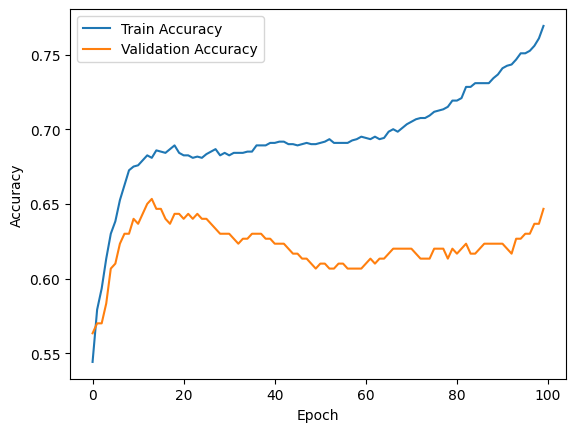

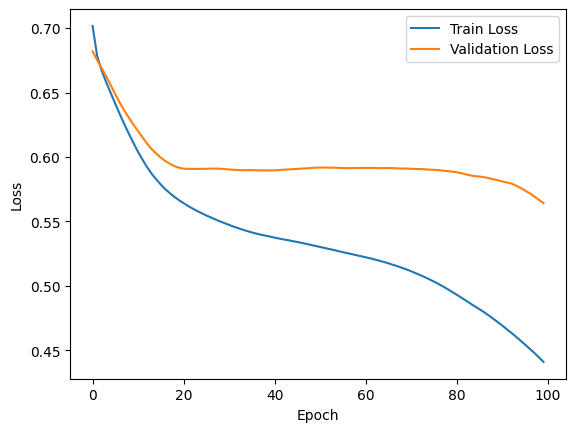

In [423]:
#Visualize the training history

def plot_metric(history,metric):
    plt.plot(history.history[metric], label=f'Train {metric.capitalize()}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

plot_metric(training, 'accuracy')
plot_metric(training, 'loss')

In [424]:
#Evaluate the model
print("\nEvaluating model on test data...")
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Evaluating model on test data...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - loss: 0.5588 
Test Accuracy: 0.6580
Test Loss: 0.5818


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


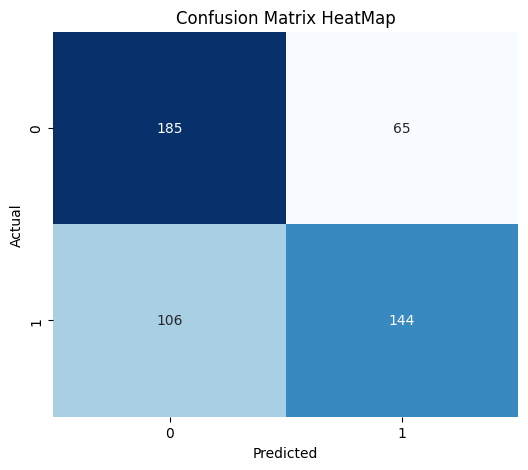

In [425]:
from sklearn.metrics import confusion_matrix

#Get predictions and covert it to a class
y_pred_prob = model.predict(x_test_scaled)

y_pred_class = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix HeatMap')
plt.show()

In [426]:
#Classification Report
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.74      0.68       250
           1       0.69      0.58      0.63       250

    accuracy                           0.66       500
   macro avg       0.66      0.66      0.66       500
weighted avg       0.66      0.66      0.66       500



In [427]:
""" import joblib 

#Saving the files
model.save_weights('mobile_price_model.weights.h5')
model.save('mobile_price_full_model.h5')

joblib.dump(scaler, 'scaler.pkl') """



" import joblib \n\n#Saving the files\nmodel.save_weights('mobile_price_model.weights.h5')\nmodel.save('mobile_price_full_model.h5')\n\njoblib.dump(scaler, 'scaler.pkl') "

In [428]:
print("\n" + "="*60)
print("MODEL SUMMARY FOR NIMAL'S MOBILE COMPANY")
print("="*60)
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Model Architecture: Input -> 8 neurons -> 4 neurons -> Output")
print(f"Training completed with 100 epochs and batch size 32")
print(f"Files saved:")
print(f"  - mobile_price_model_weights.h5 (weights only)")
print(f"  - mobile_price_complete_model.h5 (complete model)")
print(f"  - scaler.pkl (feature scaler)")
print("="*60)

# Function to make predictions on new data
def predict_price_range(features):
    """
    Function to predict price range for new mobile phone features
    features: array-like of mobile phone specifications
    Returns: 0 (low price) or 1 (high price)
    """
    # Scale the features
    features_scaled = scaler.transform([features])
    
    # Make prediction
    probability = model.predict(features_scaled)[0][0]
    prediction = 1 if probability >= 0.5 else 0
    
    print(f"Probability of high price: {probability:.4f}")
    print(f"Predicted price range: {'High (1)' if prediction == 1 else 'Low (0)'}")
    
    return prediction

print("\nExample usage:")
print("To predict price range for new mobile specifications:")
print("predict_price_range([feature1, feature2, feature3, ...])")


MODEL SUMMARY FOR NIMAL'S MOBILE COMPANY
Final Test Accuracy: 0.6580 (65.80%)
Model Architecture: Input -> 8 neurons -> 4 neurons -> Output
Training completed with 100 epochs and batch size 32
Files saved:
  - mobile_price_model_weights.h5 (weights only)
  - mobile_price_complete_model.h5 (complete model)
  - scaler.pkl (feature scaler)

Example usage:
To predict price range for new mobile specifications:
predict_price_range([feature1, feature2, feature3, ...])
